In [65]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum, cos, sin, pi
import sympy as sp
import cmath

In [108]:
a = 1 #lattice constant
# onsite energies
Ea = 0
Eb = 0
Ec = 0 

# lattice vectors
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
kagome_lattice = pb.Lattice(a1=a1, a2=a2)
kagome_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([a/2, 0]), Eb), ('C', np.array([-a/4, a*sqrt(3)/4]), Ec))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t1 = 1
t2 = 0.2

kagome_lattice.add_hoppings(
    ([0, 0], 'A', 'B', t1+1j*t2),
    ([0, 0], 'A', 'C', t1-1j*t2),
    ([0, -1], 'A', 'C', t1-1j*t2),
    ([-1, 0], 'A', 'B', t1+1j*t2),
    ([1, 0], 'B', 'C', t1+1j*t2),
    ([0, -1], 'B', 'C', t1+1j*t2),
)

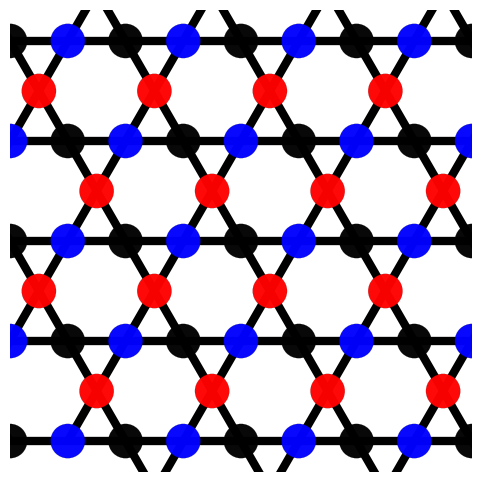

In [109]:
plt.figure(figsize=(6, 6))
kagome_model = pb.Model(
    kagome_lattice,
    pb.translational_symmetry()
)
kagome_model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2, 2)
plt.ylim(-2, 2);

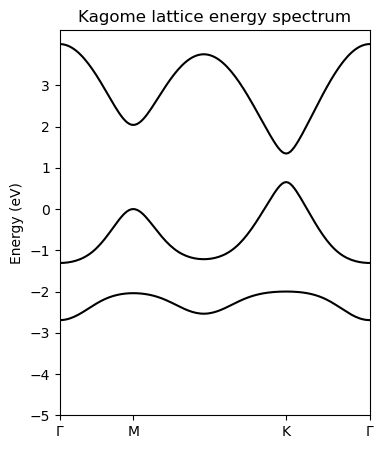

In [110]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(kagome_model)
G1, G2 = kagome_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
K = -2/3*G1+1/3*G2
M = 1/2*G1
bands = solver.calc_bands(Gamma, M, K, Gamma)
kagome_energies = bands.energy
k_path = bands.k_path
plt.plot(kagome_energies, color="black");
plt.xticks(k_path.point_indices, [r'$\Gamma$', 'M', 'K', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
#plt.ylim(-4, 2)
plt.yticks(np.linspace(-5, 3, num=9));
plt.title("Kagome lattice energy spectrum");
plt.ylabel("Energy (eV)");

In [111]:
solver = pb.solver.lapack(kagome_model)
chern = 0 
N = 40
chern_array = np.zeros((N, N))
N2 = 500
for k1 in range(0, N):
    for k2 in range(0, N):
        k = G1 * k1/N + G2 * k2/N
        delta_k_1 = G1/N2
        delta_k_2 = G2/N2
        
        solver.set_wave_vector(k)
        h = kagome_model.hamiltonian.toarray()
        psi_0 = solver.eigenvectors[:, 0]
        psi_1 = solver.eigenvectors[:, 1]
        psi_2 = solver.eigenvectors[:, 2]

        e_0 = solver.eigenvalues[0]
        e_1 = solver.eigenvalues[1]
        e_2 = solver.eigenvalues[2]

        solver.set_wave_vector(k + delta_k_1)
        h_delta_1 = kagome_model.hamiltonian.toarray()
        
        solver.set_wave_vector(k + delta_k_2)
        h_delta_2 = kagome_model.hamiltonian.toarray()
        
        overlap1 = np.einsum("i, ij, j->", np.conj(psi_1), (h_delta_2-h)*N2, psi_0)/(e_0-e_1)
        overlap2 = np.einsum("i, ij, j->", np.conj(psi_0), (h_delta_1-h)*N2, psi_1)/(e_0-e_1)
        overlap3 = np.einsum("i, ij, j->", np.conj(psi_2), (h_delta_2-h)*N2, psi_0)/(e_0-e_2)
        overlap4 = np.einsum("i, ij, j->", np.conj(psi_0), (h_delta_1-h)*N2, psi_2)/(e_0-e_2)

        berry_curvature = -np.imag(overlap1 * overlap2 + overlap3 * overlap4)/pi/N**2
        chern += berry_curvature
        chern_array[k1, k2] = berry_curvature

In [112]:
np.round(chern, 3)

1.0

In [113]:
solver = pb.solver.lapack(kagome_model)
chern = 0 
N = 40
chern_array = np.zeros((N, N))
N2 = 500
for k1 in range(0, N):
    for k2 in range(0, N):
        k = G1 * k1/N + G2 * k2/N
        delta_k_1 = G1/N2
        delta_k_2 = G2/N2
        
        solver.set_wave_vector(k)
        h = kagome_model.hamiltonian.toarray()
        psi_0 = solver.eigenvectors[:, 0]
        psi_1 = solver.eigenvectors[:, 1]
        psi_2 = solver.eigenvectors[:, 2]

        e_0 = solver.eigenvalues[0]
        e_1 = solver.eigenvalues[1]
        e_2 = solver.eigenvalues[2]

        solver.set_wave_vector(k + delta_k_1)
        h_delta_1 = kagome_model.hamiltonian.toarray()
        
        solver.set_wave_vector(k + delta_k_2)
        h_delta_2 = kagome_model.hamiltonian.toarray()
        
        overlap1 = np.einsum("i, ij, j->", np.conj(psi_0), (h_delta_2-h)*N2, psi_1)/(e_1-e_0)
        overlap2 = np.einsum("i, ij, j->", np.conj(psi_1), (h_delta_1-h)*N2, psi_0)/(e_1-e_0)
        overlap3 = np.einsum("i, ij, j->", np.conj(psi_2), (h_delta_2-h)*N2, psi_1)/(e_1-e_2)
        overlap4 = np.einsum("i, ij, j->", np.conj(psi_1), (h_delta_1-h)*N2, psi_2)/(e_1-e_2)

        berry_curvature = -np.imag(overlap1 * overlap2 + overlap3 * overlap4)/pi/N**2
        chern += berry_curvature
        chern_array[k1, k2] = berry_curvature

In [114]:
np.round(chern, 3)

-0.0

In [115]:
solver = pb.solver.lapack(kagome_model)
chern = 0 
N = 40
chern_array = np.zeros((N, N))
N2 = 500
for k1 in range(0, N):
    for k2 in range(0, N):
        k = G1 * k1/N + G2 * k2/N
        delta_k_1 = G1/N2
        delta_k_2 = G2/N2
        
        solver.set_wave_vector(k)
        h = kagome_model.hamiltonian.toarray()
        psi_0 = solver.eigenvectors[:, 0]
        psi_1 = solver.eigenvectors[:, 1]
        psi_2 = solver.eigenvectors[:, 2]

        e_0 = solver.eigenvalues[0]
        e_1 = solver.eigenvalues[1]
        e_2 = solver.eigenvalues[2]

        solver.set_wave_vector(k + delta_k_1)
        h_delta_1 = kagome_model.hamiltonian.toarray()
        
        solver.set_wave_vector(k + delta_k_2)
        h_delta_2 = kagome_model.hamiltonian.toarray()
        
        overlap1 = np.einsum("i, ij, j->", np.conj(psi_0), (h_delta_2-h)*N2, psi_2)/(e_2-e_0)
        overlap2 = np.einsum("i, ij, j->", np.conj(psi_2), (h_delta_1-h)*N2, psi_0)/(e_2-e_0)
        overlap3 = np.einsum("i, ij, j->", np.conj(psi_1), (h_delta_2-h)*N2, psi_2)/(e_2-e_1)
        overlap4 = np.einsum("i, ij, j->", np.conj(psi_2), (h_delta_1-h)*N2, psi_1)/(e_2-e_1)

        berry_curvature = -np.imag(overlap1 * overlap2 + overlap3 * overlap4)/pi/N**2
        chern += berry_curvature
        chern_array[k1, k2] = berry_curvature

In [116]:
np.round(chern, 3)

-1.0

# Edge states

In [117]:
a = 1 #lattice constant
# onsite energies
Ea = 0
Eb = 0
Ec = 0 

# lattice vectors
N = 20
a1 = np.array([a, 0])
a2 = np.array([-a/2, a*sqrt(3)/2])
kagome_lattice_finite = pb.Lattice(a1=a1)
for n in range(0, N):
    kagome_lattice_finite.add_sublattices(
        (f'A{n}', np.array([0, 0])+n*a2, Ea), (f'B{n}', np.array([a/2, 0])+n*a2, Eb), (f'C{n}', np.array([-a/4, a*sqrt(3)/4])+n*a2, Ec))  # add an atom called 'A' at position [0, 0]

In [118]:
# nearest-neighbor hopping
t1 = 1
t2 = 0.2
for n in range(0, N):
    kagome_lattice_finite.add_hoppings(
        ([0], f'A{n}', f'B{n}', t1+1j*t2),
        ([0], f'A{n}', f'C{n}', t1-1j*t2),
        ([-1], f'A{n}', f'B{n}', t1+1j*t2),
        ([1], f'B{n}', f'C{n}', t1+1j*t2),
    )
for n in range(1, N):
    kagome_lattice_finite.add_hoppings(
        ([0], f'A{n}', f'C{n-1}', t1-1j*t2),
        ([0], f'B{n}', f'C{n-1}', t1+1j*t2),
    )
kagome_model_finite = pb.Model(
    kagome_lattice_finite,
    pb.translational_symmetry()
)

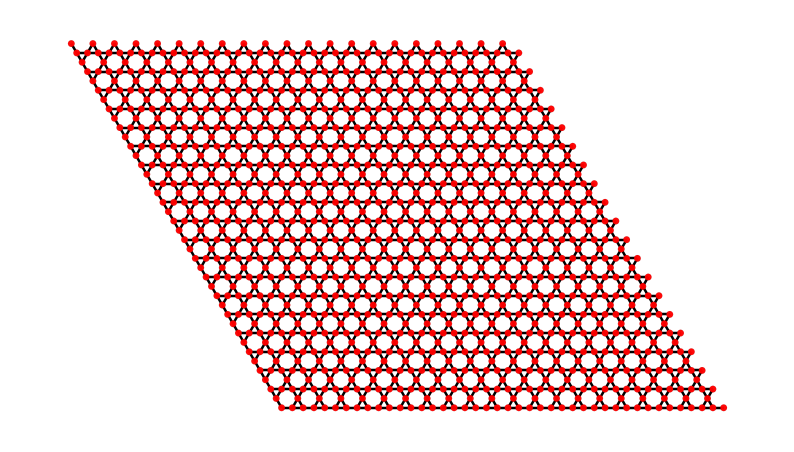

In [119]:
plt.figure(figsize=(10, 10))
kagome_model_finite.plot(num_periods=10,
          hopping = {
  "width": 3, "color": "black", "blend" : 1,
}, sites={"cmap" : ["red"], "blend" : 1 })
plt.gca().axis('off');

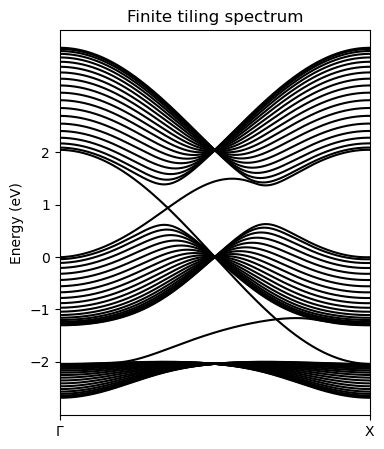

In [120]:
plt.figure(figsize=(4, 5))
solver = pb.solver.lapack(kagome_model_finite)
G1 = kagome_lattice_finite.reciprocal_vectors()[0]

G1 = G1[0:2]
kagome_bzone = kagome_lattice_finite.brillouin_zone()

Gamma = np.array([0, 0])
X = G1
bands = solver.calc_bands(Gamma, -X, step=X[0]/1000)
kagome_energies = bands.energy
k_path = bands.k_path
plt.plot(kagome_energies, color="black")

plt.xticks(k_path.point_indices, [r'$\Gamma$', 'X'])
plt.xlim(0, len(k_path)-1)
#plt.ylim(-2, 2)
plt.yticks(np.linspace(-2, 2, num=5));
plt.title("Finite tiling spectrum");
plt.ylabel("Energy (eV)");

# Berry Phase Winding

In [121]:
solver = pb.solver.lapack(kagome_model)
N2 = 500
N1 = 200
berry_phases = np.zeros((3, N1+1))

for band_idx in range(0, 3):
    print(f"Calculating berry phases for band {band_idx}")
    for k2 in range(0, N1+1):
        berry_phase = 1
        k_origin = G1 * k2/N1
        psi_last = np.zeros(2, dtype=complex) 
        psi_prev = np.zeros(2, dtype=complex) 
    
        for k1 in range(0, N2):
            k = k_origin + G2 * k1/N2
            delta_k_1 = G2/N2
            solver.set_wave_vector(k)
            psi_0 = solver.eigenvectors[:, band_idx]
            if k1 == 0:
                psi_last = psi_0
            solver.set_wave_vector(k + delta_k_1)
            psi_1 = solver.eigenvectors[:, band_idx]
            if k1 == N2-1: 
                overlap = np.einsum("i, i->", np.conj(psi_0), psi_last)
            elif k1 == 0:
                overlap = np.einsum("i, i->", np.conj(psi_0), psi_1)
            else:
                overlap = np.einsum("i, i->", np.conj(psi_prev), psi_1)
            psi_prev = psi_1
    
            berry_phase *= overlap    
        berry_phases[band_idx, k2] = cmath.phase(berry_phase)

Calculating berry phases for band 0
Calculating berry phases for band 1
Calculating berry phases for band 2


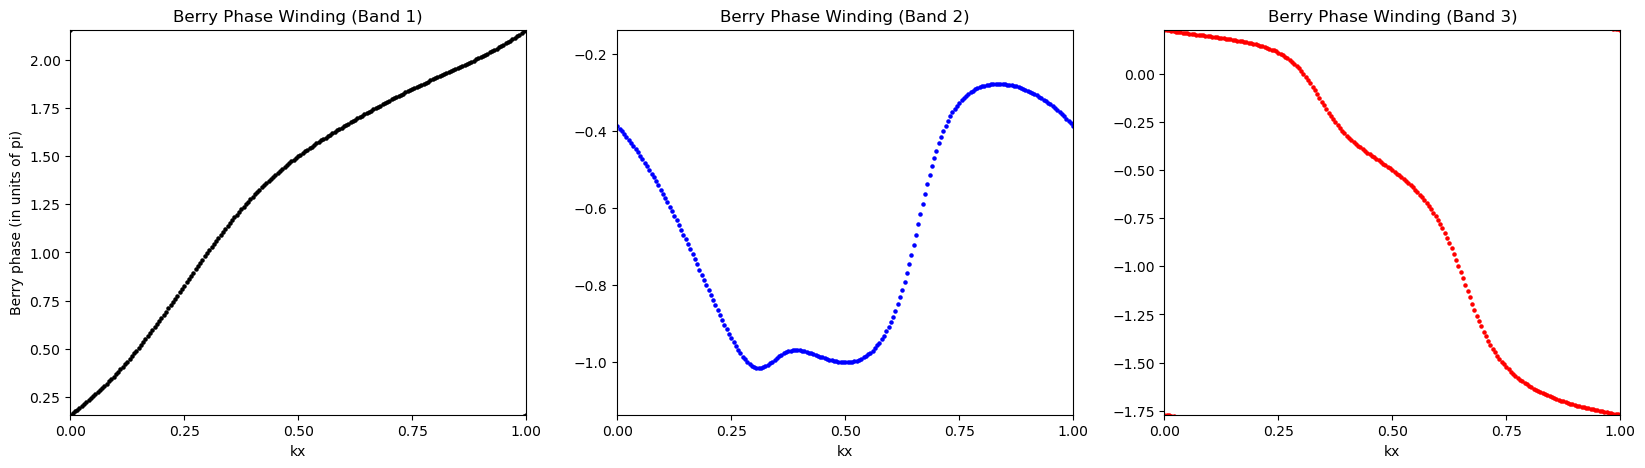

In [122]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 5))
plt.sca(ax0)
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[0, :]/np.pi, s=5, color="black")
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[0, :]/np.pi+2, s=5, color="black")
plt.xlim(0, 1);
plt.ylim(-berry_phases[0, 0]/np.pi, -berry_phases[0, 0]/np.pi+2);
plt.xticks([0, 0.25, 0.5, 0.75, 1]);
#plt.yticks([-1, 0, 1]);
plt.title("Berry Phase Winding (Band 1)")
plt.xlabel("kx")
plt.ylabel("Berry phase (in units of pi)");

plt.sca(ax1)
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[1, :]/np.pi, s=5, color="blue")
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[1, :]/np.pi+2, s=5, color="blue")
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[1, :]/np.pi-2, s=5, color="blue")
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[1, :]/np.pi+4, s=5, color="blue")

plt.xlim(0, 1);
plt.ylim(-berry_phases[1, 0]/np.pi-0.75, -berry_phases[1, 0]/np.pi+0.25);
plt.xticks([0, 0.25, 0.5, 0.75, 1]);
#plt.yticks([-1, 0, 1]);
plt.title("Berry Phase Winding (Band 2)")
plt.xlabel("kx")

plt.sca(ax2)
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[2, :]/np.pi, s=5, color="red")
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[2, :]/np.pi+2, s=5, color="red")
plt.scatter(np.linspace(0, 1, N1+1), -berry_phases[2, :]/np.pi-2, s=5, color="red")

plt.xlim(0, 1);
plt.ylim(-berry_phases[2, 0]/np.pi-2, -berry_phases[2, 0]/np.pi);
plt.xticks([0, 0.25, 0.5, 0.75, 1]);
#plt.yticks([-1, 0, 1]);
plt.title("Berry Phase Winding (Band 3)")
plt.xlabel("kx");